# Proyecto - PlusTI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis exploratorio de datos

In [2]:
# Cargar el dataset
df = pd.read_csv("dataset_feature_engineering.csv")
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

In [4]:
# Verificar valores nulos
df.isnull().sum()

cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_between_client_and_merch      0
t

In [7]:
# Recuento de clases
print("Recuento de clases:")
print(df['is_fraud'].value_counts())

# Porcentaje de clases
print("\nPorcentaje de clases:")
print(df['is_fraud'].value_counts(normalize=True) * 100)

Recuento de clases:
is_fraud
0    1842743
1       9651
Name: count, dtype: int64

Porcentaje de clases:
is_fraud
0    99.478999
1     0.521001
Name: proportion, dtype: float64


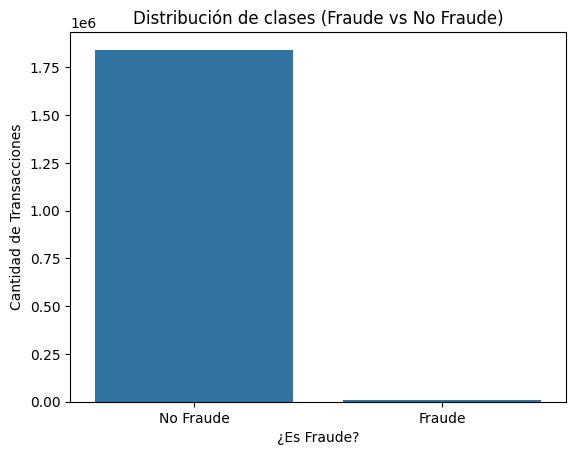

In [8]:
# Visualización
sns.countplot(data=df, x='is_fraud')
plt.title('Distribución de clases (Fraude vs No Fraude)')
plt.xlabel('¿Es Fraude?')
plt.ylabel('Cantidad de Transacciones')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

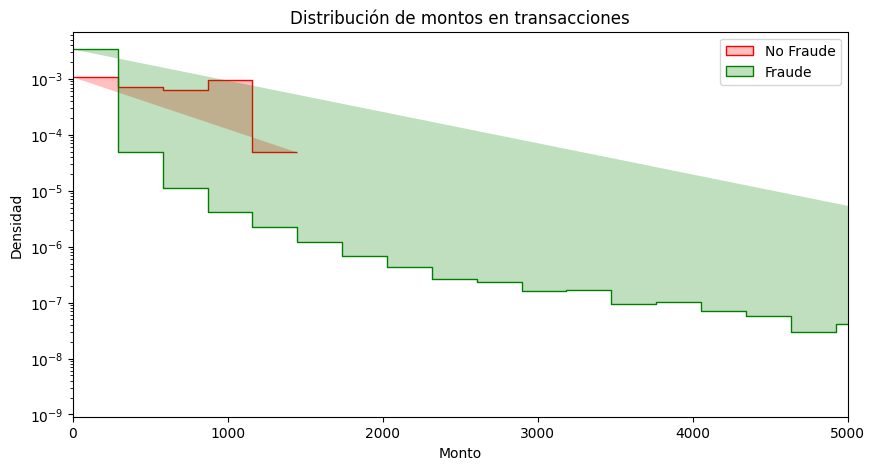

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='amt', bins=100, hue='is_fraud', log_scale=(False, True), palette=['green', 'red'], element='step', stat='density', common_norm=False)
plt.title('Distribución de montos en transacciones')
plt.xlabel('Monto')
plt.ylabel('Densidad')
plt.xlim(0, 5000)
plt.legend(labels=['No Fraude', 'Fraude'])
plt.show()

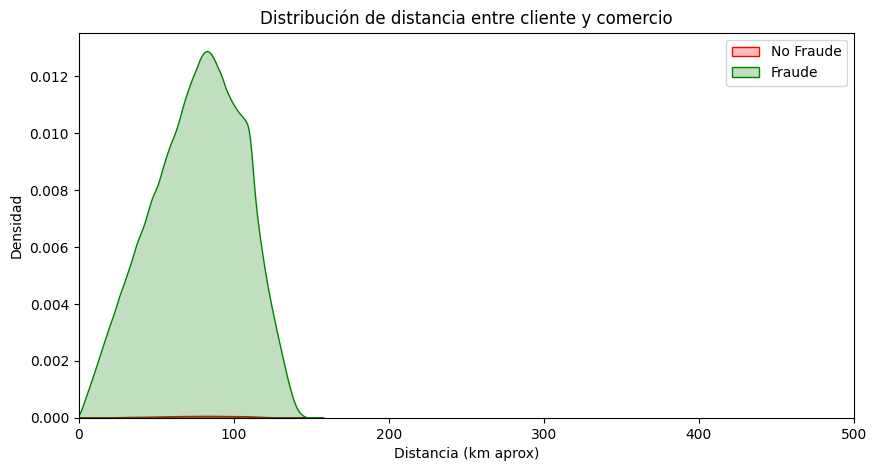

In [13]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='dist_between_client_and_merch', hue='is_fraud', fill=True, palette=['green', 'red'])
plt.title('Distribución de distancia entre cliente y comercio')
plt.xlabel('Distancia (km aprox)')
plt.ylabel('Densidad')
plt.legend(labels=['No Fraude', 'Fraude'])
plt.xlim(0, 500)
plt.show()

C:\Users\50242\AppData\Local\Temp\ipykernel_32636\1601078828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraude_por_categoria.values, y=fraude_por_categoria.index, palette='Reds_r')


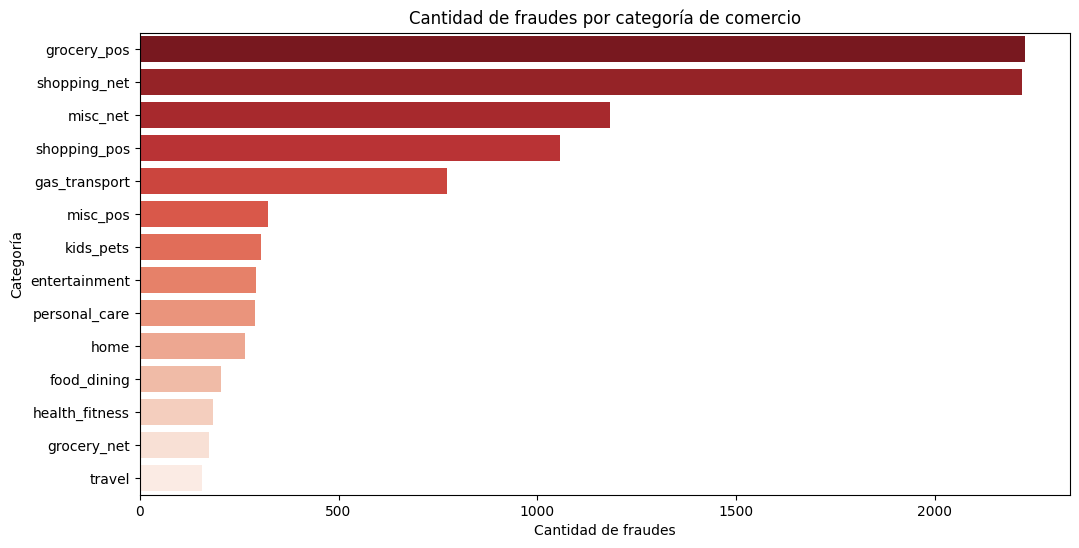

In [15]:
fraude_por_categoria = df[df['is_fraud'] == 1]['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=fraude_por_categoria.values, y=fraude_por_categoria.index, palette='Reds_r')
plt.title('Cantidad de fraudes por categoría de comercio')
plt.xlabel('Cantidad de fraudes')
plt.ylabel('Categoría')
plt.show()

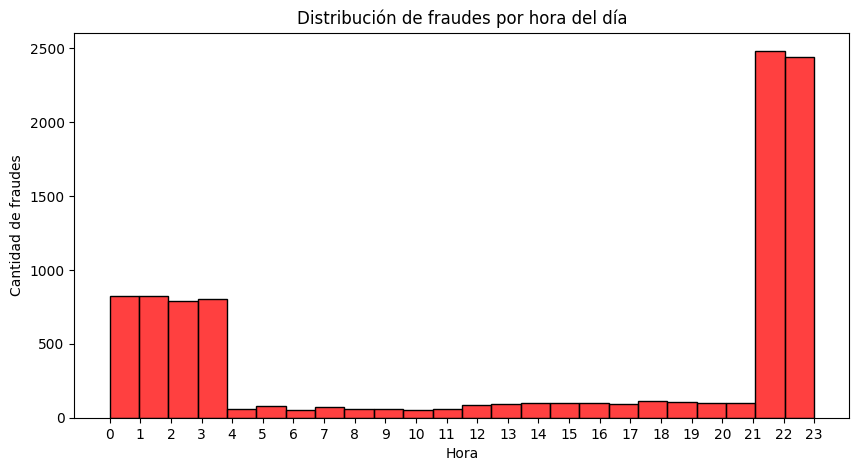

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['is_fraud'] == 1], x='hour', bins=24, color='red', kde=False)
plt.title('Distribución de fraudes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de fraudes')
plt.xticks(range(0, 24))
plt.show()